In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
penguin = sns.load_dataset('penguins')
penguin

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [3]:
penguin.shape

(344, 7)

In [4]:
penguin.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [5]:
penguin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
penguin.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


<Axes: ylabel='Density'>

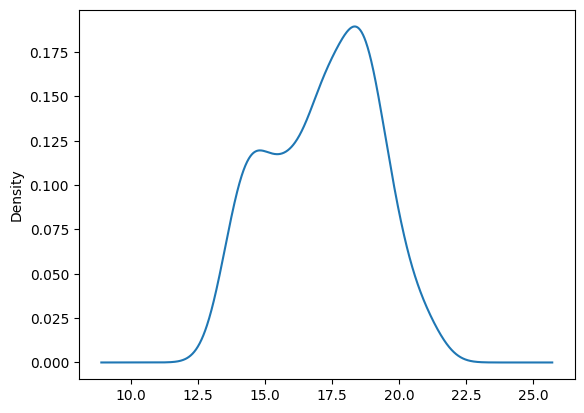

In [7]:
penguin['bill_depth_mm'].plot(kind='kde') 

In [8]:
penguin['bill_depth_mm'].skew()

np.float64(-0.1434646251943698)

In [9]:
xcol = penguin.drop(columns=(['flipper_length_mm','body_mass_g','sex','species','island']))
xcol

,bill_length_mm,bill_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
3,NaN,NaN
4,36.7,19.3
...,...,...
339,NaN,NaN
340,46.8,14.3
341,50.4,15.7
342,45.2,14.8


In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(xcol,penguin.drop(columns=(['sex','flipper_length_mm','bill_depth_mm','body_mass_g'])),test_size=0.2)

In [11]:
x_train

,bill_length_mm,bill_depth_mm
15,36.6,17.8
262,45.3,13.7
214,45.7,17.0
339,NaN,NaN
219,50.2,18.7
...,...,...
14,34.6,21.1
74,35.5,17.5
43,44.1,19.7
12,41.1,17.6


In [12]:
x_test

,bill_length_mm,bill_depth_mm
283,54.3,15.7
243,46.3,15.8
152,46.5,17.9
70,33.5,19.0
159,51.3,18.2
...,...,...
82,36.7,18.8
255,48.4,16.3
334,46.2,14.1
118,35.7,17.0


In [13]:
y_train

,species,island,bill_length_mm
15,Adelie,Torgersen,36.6
262,Gentoo,Biscoe,45.3
214,Chinstrap,Dream,45.7
339,Gentoo,Biscoe,NaN
219,Chinstrap,Dream,50.2
...,...,...,...
14,Adelie,Torgersen,34.6
74,Adelie,Torgersen,35.5
43,Adelie,Dream,44.1
12,Adelie,Torgersen,41.1


In [14]:
y_test

,species,island,bill_length_mm
283,Gentoo,Biscoe,54.3
243,Gentoo,Biscoe,46.3
152,Chinstrap,Dream,46.5
70,Adelie,Torgersen,33.5
159,Chinstrap,Dream,51.3
...,...,...,...
82,Adelie,Torgersen,36.7
255,Gentoo,Biscoe,48.4
334,Gentoo,Biscoe,46.2
118,Adelie,Torgersen,35.7


In [15]:
# Min max scaling 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [16]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [17]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_train_scaled

,bill_length_mm,bill_depth_mm
0,0.173745,0.5750
1,0.509653,0.0625
2,0.525097,0.4750
3,NaN,NaN
4,0.698842,0.6875
...,...,...
270,0.096525,0.9875
271,0.131274,0.5375
272,0.463320,0.8125
273,0.347490,0.5500


In [18]:
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)
x_test_scaled

,bill_length_mm,bill_depth_mm
0,0.796935,0.309524
1,0.490421,0.321429
2,0.498084,0.571429
3,0.000000,0.702381
4,0.681992,0.607143
...,...,...
64,0.122605,0.678571
65,0.570881,0.380952
66,0.486590,0.119048
67,0.084291,0.464286


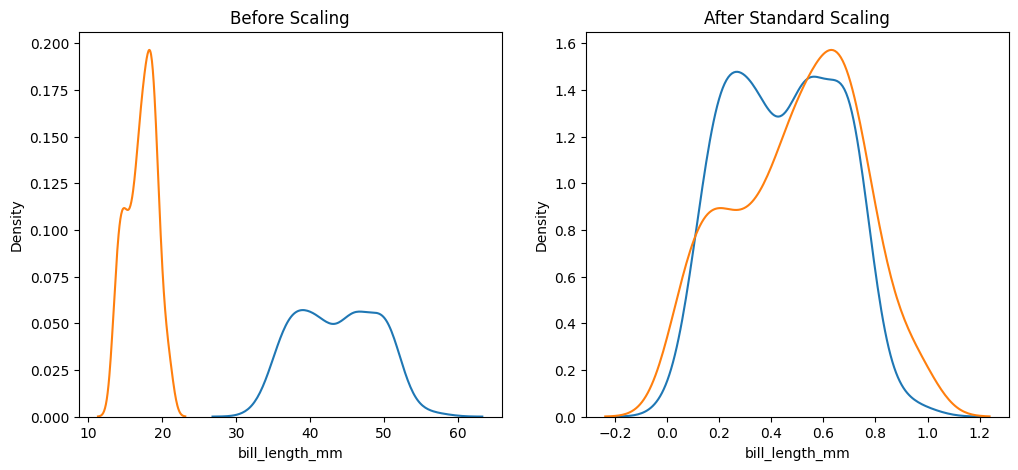

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['bill_length_mm'], ax=ax1)
sns.kdeplot(x_train['bill_depth_mm'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['bill_length_mm'], ax=ax2)
sns.kdeplot(x_train_scaled['bill_depth_mm'], ax=ax2)
plt.show()

In [20]:
x_train.describe()

,bill_length_mm,bill_depth_mm
count,273.000000,273.000000
mean,43.694505,17.179121
std,5.429285,1.951612
min,32.100000,13.200000
25%,39.000000,15.700000
50%,43.600000,17.300000
75%,48.500000,18.600000
max,58.000000,21.200000


In [21]:
x_train_scaled.describe()

,bill_length_mm,bill_depth_mm
count,273.000000,273.000000
mean,0.447664,0.497390
std,0.209625,0.243952
min,0.000000,0.000000
25%,0.266409,0.312500
50%,0.444015,0.512500
75%,0.633205,0.675000
max,1.000000,1.000000
